# **Motive behind Version:** 

This version has a CNN designed to train and test on thermal images to recognize what has been typed by the users. The dataset contains 36 classes (typed phrases/passwords). Additionally this dataset contains both high quality and usable thermal images to emulate a more realistic setup. This is done to showcase the experimental setup.

# **Part 1 - Importing Necessary libraries**  

Here we import all the necessary libraries

In [1]:
#Load libraries
#Load libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
from pandas import read_csv
from __future__ import print_function
import pandas as pd
import shutil
import sys
from os.path import join



# **Part 2 - Importing the necessary image data and CSV files**  

This section has the following functions - 


*   First we get the labels of the data from the csv file.
*   The obtained labels are then separated into Training and testing sets (8:2)

*   A small check is done to see whether the training and testing sets have the same number of unique classes.
*   The images are now separated into two different folders based on training and testing lists. 


In [2]:

map_file = read_csv('/content/Training.csv')
length = len(map_file)
print(length)
labels = set()
for i in range(len(map_file)):
    # convert spaced separated tags into an array of tags
    type = map_file['Password'][i].split('\n')
    # add tags to the set of known labels
    labels.update(type)
#print(labels)
labels = list(labels)
labels.sort()
classes = labels
classes

522


['!yQS3xBc9z4u_cLg',
 '1?wb:J5c6X[-5az7',
 '3}fW8&tR4bmdY_b7',
 '5&Q_dpgwaE5hT?a',
 '6$=XhwcpH%a6bf9*',
 'A Nymph begs for quick waltz!',
 'A big dwarf only jumps at.',
 'A big dwarf only jumps!',
 'A blocky dwarf zings a jump!',
 'Blocky dwarf zings the jump?',
 'Blocky dwarfs sing the jumps?',
 'End by win a pun!',
 'G?f(aGqGxn3eg*v#',
 'Nrc@NAt6duvyjNJb',
 'Nymph begs for quick waltz!',
 'Nymphs beg for quick waltz!',
 'Rh(3q4aRmWx!R)e',
 'The big dwarf only jumps at?',
 'The big dwarf only jumps?',
 'The world is a stage!',
 'ben_clark@post.cd',
 'cKNmH?uncg9R=#7s',
 'dun_edwards@post.ik',
 'gareth_king@post.cd',
 'gareth_wub@post.cd',
 'gwen_king@post.com',
 'hMNwZbawfCr9vb&p',
 'jack_cox@post.de',
 'jack_king@post.uk',
 'james_king@post.com',
 'john_clark@post.com',
 'kyle_king@post.uk',
 'mason_levi@post.cd',
 'qHP4x-%6aBZq84jM',
 'zdJq&cg5A$dX2ndT']

#### **Disclaimer during testing : Please check the path of the training and testing directory, and the CSV files. As mentioned in the user guide, please copy the path from your drive for the directory containing the images and the CSV files.**

##**Subpart 1**

The images are divided into training and testing directories depending on the training and testing labels.

In [3]:
ran = np.random.RandomState()
train_labels = map_file.sample(frac=0.8, random_state=ran)
test_labels = map_file.loc[~map_file.index.isin(train_labels.index)]

train_label_class = []
test_label_class = []
for filename, class_name in train_labels.values:
    if class_name not in train_label_class:
        train_label_class.append(class_name)
        

for filename, class_name in test_labels.values:
    if class_name not in test_label_class:
        test_label_class.append(class_name)

while(len(test_label_class) != len(train_label_class)):
  train_labels = map_file.sample(frac=0.8, random_state=ran)
  test_labels = map_file.loc[~map_file.index.isin(train_labels.index)]
  train_label_class.clear()
  test_label_class.clear()
  for filename, class_name in train_labels.values:
    if class_name not in train_label_class:
        train_label_class.append(class_name)
        

  for filename, class_name in test_labels.values:
    if class_name not in test_label_class:
        test_label_class.append(class_name)
len(train_label_class) == len(test_label_class)         

True

**Disclaimer - Please change the path of the train_dir and test_dir to the folder containing the images. Both variables will point to the same part**

In [5]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys
from os.path import join


train_dir =r'/content/drive/MyDrive/Colab Notebooks/Thermal Image/Training'
train_path = r"Training_Label"
if not os.path.exists(train_path):
    os.mkdir(train_path)

test_dir =r'/content/drive/MyDrive/Colab Notebooks/Thermal Image/Training'
test_path = r"Testing_Label"
if not os.path.exists(test_path):
    os.mkdir(test_path)

for filename, class_name in train_labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(train_path + '/'+ str(class_name)):
        os.mkdir(train_path + '/'+ str(class_name))
    src_path = train_dir + '/'+ str(filename) + '.jpg'
    dst_path = train_path + '/'+ str(class_name) + '/' + str(filename) + '.jpg'
    try:
        shutil.copy(src_path, dst_path)
        print("File Transfer Successful")
    except:
        print('Error')



for filename, class_name in test_labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(test_path + '/'+ str(class_name)):
        os.mkdir(test_path + '/'+ str(class_name))
    src_path = test_dir + '/'+ str(filename) + '.jpg'
    dst_path = test_path + '/'+ str(class_name) + '/' + str(filename) + '.jpg'
    try:
        shutil.copy(src_path, dst_path)
        print("File Transfer Successful")
    except:
        print('Error')

File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful
File Transfer Successful


# **Part 3 - Designing the Neural Network**  

Now we start designing the Neural Network. We chose to use Convolutional Neural Network which was designed using the PyTorch Library. 


#### **Subpart 1**


*   
We define a transfomer and that resizes the image and transforms the file to tensor
*   We also check if the device is running on cuda or CPU



In [6]:
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")
print("device type : ",device)
transformer=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(), 
])

device type :  cpu


#### **Subpart 2**


We now load the data



In [8]:
Dataloader_training=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=8, shuffle=True
)
Dataloader_testing=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=4, shuffle=True
)

#### **Subpart 3 - The CNN Network**





In [9]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=35):
        super(ConvNet,self).__init__()
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=1)
        self.bn1=nn.BatchNorm2d(num_features=10)
        self.relu1=nn.ReLU()  
        
        self.pool=nn.MaxPool2d(kernel_size=2)
        
        self.conv2=nn.Conv2d(in_channels=10,out_channels=24,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
    
        self.conv3=nn.Conv2d(in_channels=24,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=32 **3,out_features=num_classes)
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
            
        output=self.pool(output)
            
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
             
        output=output.view(-1,32**3)
                
        output=self.fc(output)
            
        return output

In [10]:
model=ConvNet(num_classes=35).to(device)

In [11]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [12]:
epoch_count = 50


In [13]:
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

# **Part 4 - Training and Testing the Network**  

The network is trained and tested 50 times and the best result in terms of accuracy is retained.


In [14]:
best_accuracy=0.0
predlist_final=[]
lbllist_final=[]

for epoch in range(epoch_count):
    predlist=[]
    lbllist=[]
    #Evaluation and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(Dataloader_training):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        optimizer.zero_grad()
        
        outputs=model(images)
        loss=loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        
        
        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
    
    
    # Evaluation on testing dataset
    model.eval()
    
    test_accuracy=0.0
    for i, (images,labels) in enumerate(Dataloader_testing):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
        predlist.extend(prediction)
        lbllist.extend(labels.data)
    test_accuracy=test_accuracy/test_count
    
    
    print('Iteration: '+str(epoch)+'\nTrain Loss: '+str(train_loss)+'\nTrain Accuracy: '+str(train_accuracy)+'\nTest Accuracy: '+str(test_accuracy))
    print("\n\n")
    
    #Save the best model
    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=test_accuracy
        predlist_final.clear()
        lbllist_final.clear()
        predlist_final = predlist[:]
        lbllist_final = lbllist


Iteration: 0
Train Loss: tensor(3.9457)
Train Accuracy: 0.028708133971291867
Test Accuracy: 0.04807692307692308



Iteration: 1
Train Loss: tensor(3.5612)
Train Accuracy: 0.06220095693779904
Test Accuracy: 0.028846153846153848



Iteration: 2
Train Loss: tensor(3.2220)
Train Accuracy: 0.11004784688995216
Test Accuracy: 0.038461538461538464



Iteration: 3
Train Loss: tensor(2.8547)
Train Accuracy: 0.24401913875598086
Test Accuracy: 0.028846153846153848



Iteration: 4
Train Loss: tensor(2.4671)
Train Accuracy: 0.3684210526315789
Test Accuracy: 0.038461538461538464



Iteration: 5
Train Loss: tensor(2.1343)
Train Accuracy: 0.47129186602870815
Test Accuracy: 0.009615384615384616



Iteration: 6
Train Loss: tensor(1.8387)
Train Accuracy: 0.6220095693779905
Test Accuracy: 0.028846153846153848



Iteration: 7
Train Loss: tensor(1.5540)
Train Accuracy: 0.6889952153110048
Test Accuracy: 0.038461538461538464



Iteration: 8
Train Loss: tensor(1.2871)
Train Accuracy: 0.8014354066985646
Test Acc

# **Part 5 - Results and Visualization**

This part is divided into the following part - 


*   Display accuracy

*   Show confusion matrix
*   Calculate Precision and Recall


*   Display all results




In [15]:
print("The highest accuracy among all iteration is " + str(best_accuracy*100) + " %")



The highest accuracy among all iteration is 4.807692307692308 %


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


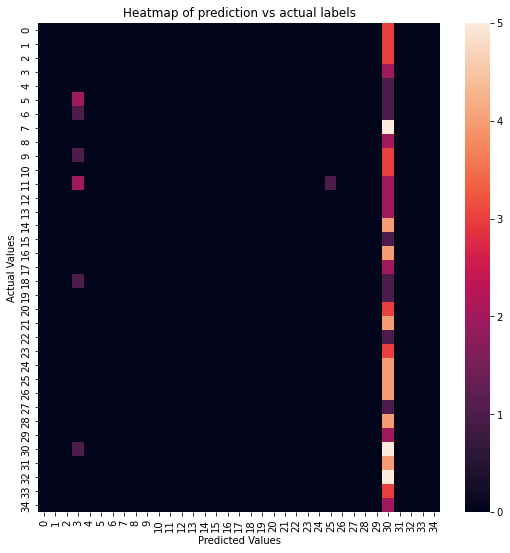

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
conmat = confusion_matrix(lbllist_final, predlist_final)
#disp = ConfusionMatrixDisplay(confusion_matrix=conmat)
#disp.plot()
#plt.show()
print(conmat)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(conmat)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
ax.set_title('Heatmap of prediction vs actual labels')
plt.show()






In [17]:
FP = conmat.sum(axis=0) - np.diag(conmat)  
FN = conmat.sum(axis=1) - np.diag(conmat)
TP = np.diag(conmat)
TN = conmat.sum() - (FP + FN + TP)

In [18]:
print(FP)
print(FN)
print(TP)
print(TN)

[ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0  0  0 90  0  0  0  0]
[3 3 3 2 1 3 2 5 2 4 3 5 2 2 4 1 4 2 2 1 3 4 1 3 4 4 4 1 4 2 1 4 5 3 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
[101 101 101  94 103 101 102  99 102 100 101  99 102 102 100 103 100 102
 102 103 101 100 103 101 100  99 100 103 100 102   8 100  99 101 102]


In [19]:
def Precision (TP, FP):
  ans = 0
  total = 0
  for i in range(len(TP)):
    total +=1
    ans += (TP[i])/(TP[i]+FP[i])
  return ans/total 

In [20]:
def Recall (TP, FN):
  ans = 0
  total = 0
  for i in range(len(TP)):
    total +=1
    ans += (TP[i])/(TP[i]+FN[i])
  return ans/total 

In [21]:
print("Accuracy of the best model : ", str(best_accuracy*100) + " %")
print("Average Precision of best model :", str(Precision(TP,FP)*100) + "%")
print("Average Recall of best model :", str(Recall(TP,FN)*100), "%")

Accuracy of the best model :  4.807692307692308 %
Average Precision of best model : nan%
Average Recall of best model : 2.3809523809523814 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


# **Citations**  

This code was created with the help of several online tutorials and books which are listed below - 


*   Sewak, Mohit, Md Rezaul Karim, and Pradeep Pujari. Practical convolutional neural networks: implement advanced deep learning models using Python. Packt Publishing Ltd, 2018.

*   [https://www.youtube.com/watch?v=9OHlgDjaE2I](https://www.youtube.com/watch?v=9OHlgDjaE2I,)

*   [https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html](https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html,)
*   [https://www.youtube.com/watch?v=7q7E91pHoW4&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=11&ab_channel=PythonEngineer](https://www.youtube.com/watch?v=7q7E91pHoW4&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=11&ab_channel=PythonEngineer,)


*   [https://www.youtube.com/watch?v=pDdP0TFzsoQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=14&ab_channel=PythonEngineer](https://www.youtube.com/watch?v=pDdP0TFzsoQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=14&ab_channel=PythonEngineer,)






